<a href="https://colab.research.google.com/github/charissaida/PCVK_Genap2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


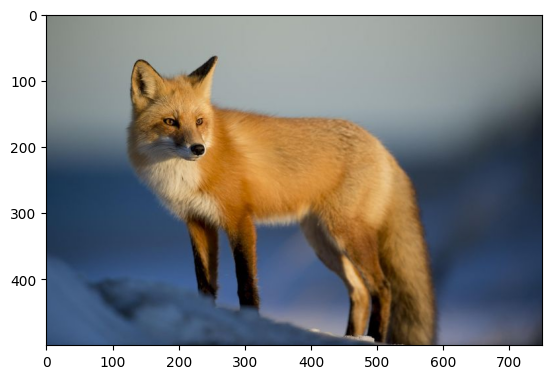

In [4]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img_f = cv.imread('/content/drive/MyDrive/Pengolahan Citra/Hewan.jpg')
img_rgb = cv.cvtColor(img_f,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

Nomor 1

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


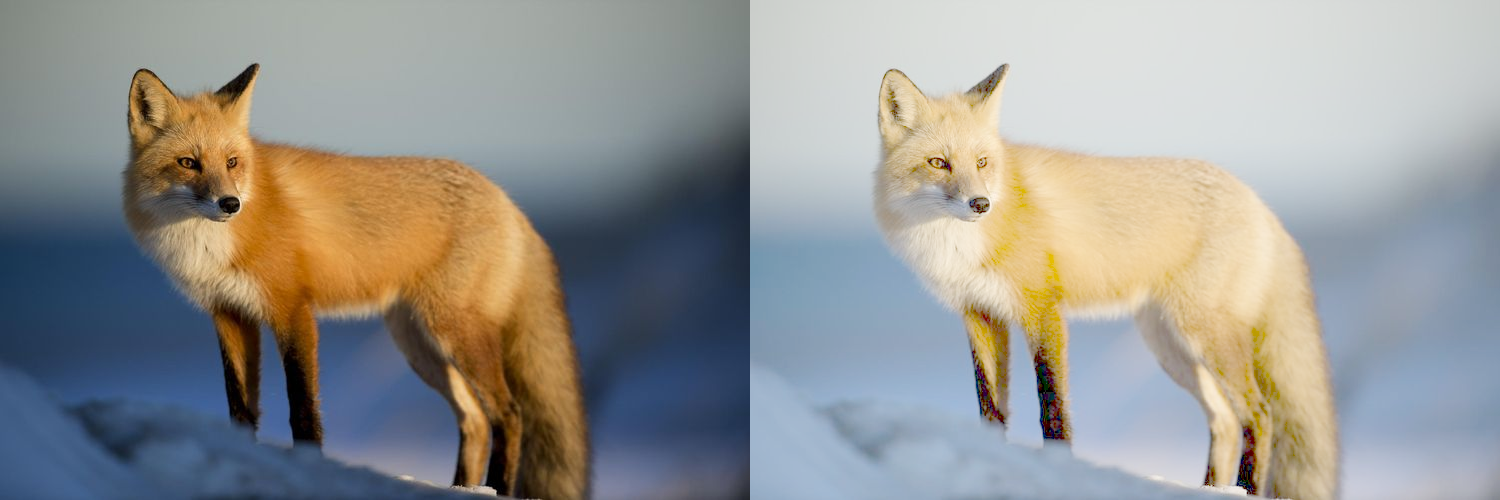

In [11]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try: 
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)
     
hasil = cv.hconcat((original, gamma_image))
cv2_imshow(hasil)

Nomor 2

 Simulasi Image Depth 
----------------------
Masukkan nilai bit depth [1-7]: 5


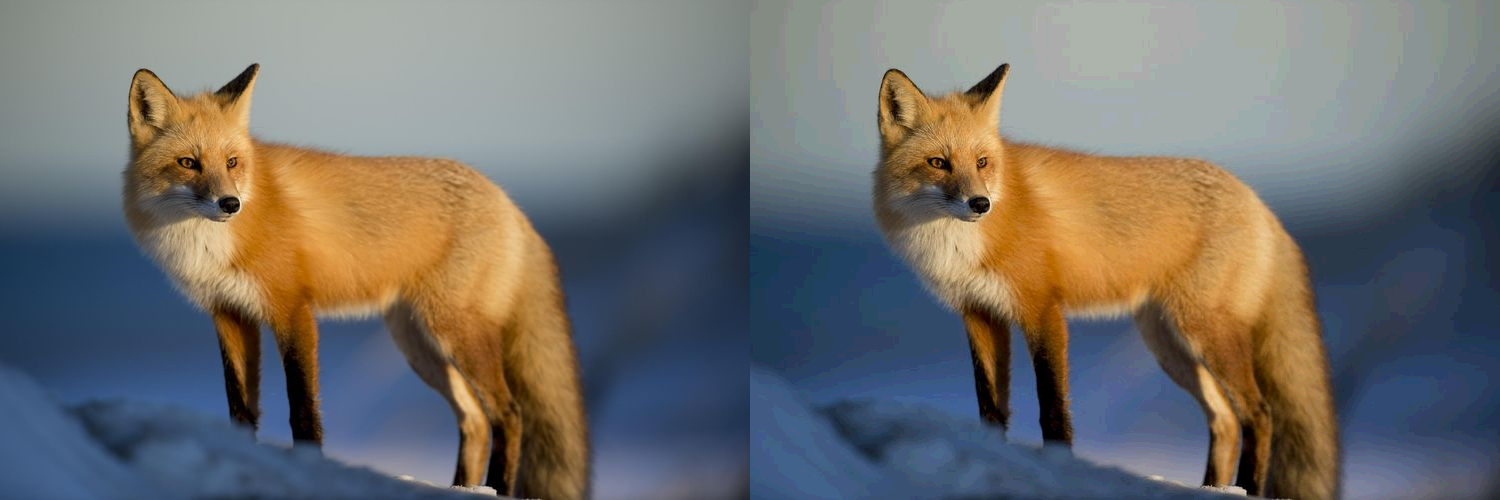

In [7]:
original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

print(' Simulasi Image Depth ')
print('----------------------')
try:
  bd = float(input('Masukkan nilai bit depth [1-7]: '))
except ValueError:
  print('Error, not a number')

bit = 2**bd
level = 255 / (bit - 1)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(round(original[y,x,c] / level) * level, 0, 255);

hasil = cv.hconcat((original, gamma_image))
cv2_imshow(hasil)

Nomor 3

In [60]:
import glob
from math import log10, sqrt
  
original = cv.imread('/content/drive/MyDrive/Pengolahan Citra/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Pengolahan Citra/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

Nilai PSNR adalah 27.53739556288879 (dB)


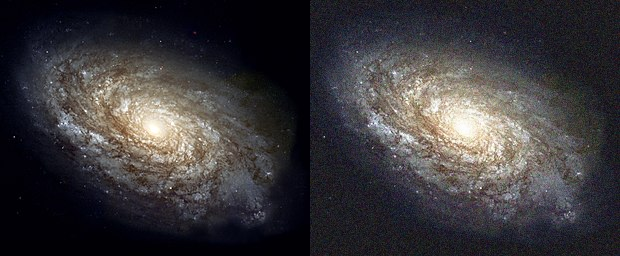

In [62]:
# 5 Citra
dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.52649642867609 (dB)


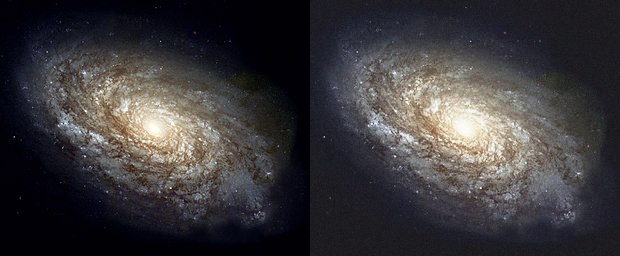

In [63]:
# 30 Citra
dst = cv_img[0]
noise_number = 29 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.486576452842627 (dB)


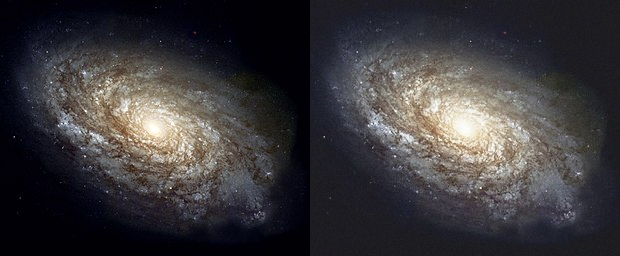

In [64]:
# 60 Citra
dst = cv_img[0]
noise_number = 59 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.497225807023703 (dB)


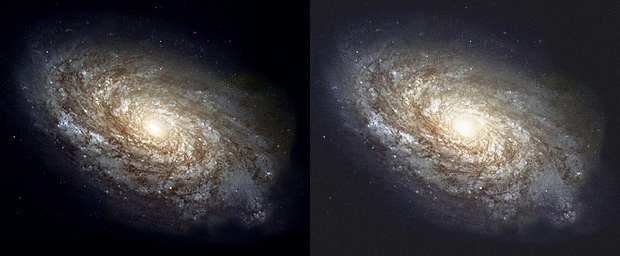

In [65]:
# 80 Citra
dst = cv_img[0]
noise_number = 79 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.505916158991397 (dB)


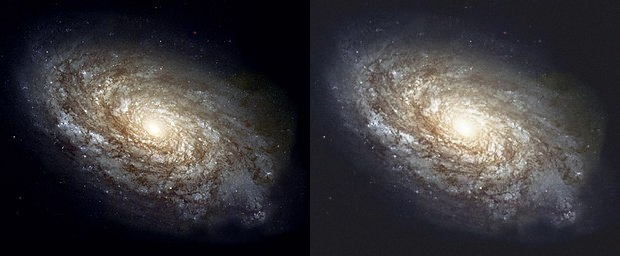

In [66]:
# 100 Citra
dst = cv_img[0]
noise_number = 99 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nomor 4

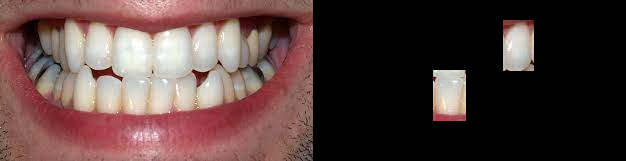

In [38]:
img_t = cv.imread('/content/drive/MyDrive/Pengolahan Citra/gigi.jpg')

mask = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(120,120),pt2=(152,70),color=(255,255,255),thickness=-1)

result = img_t & mask

mask1 = cv.rectangle(mask,pt1=(190,70),pt2=(220,20),color=(255,255,255),thickness=-1)

result = img_t & mask1

teeth_frame = cv.hconcat((img_t, result))
cv2_imshow(teeth_frame)

Nomor 5

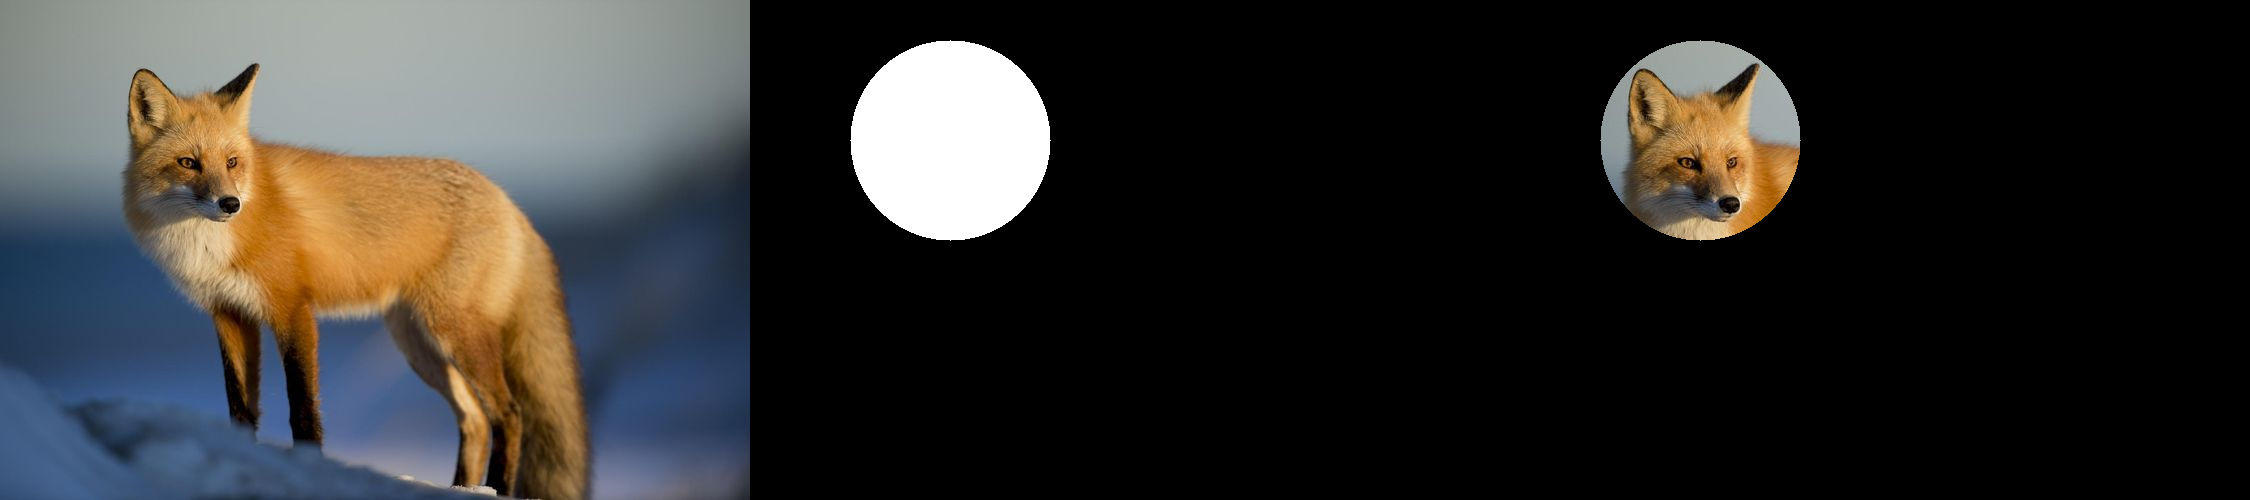

In [52]:
image = cv.imread('/content/drive/MyDrive/Pengolahan Citra/Hewan.jpg')

# AND
mask = np.zeros(image.shape, dtype=np.uint8)
mask = cv.circle(mask, (200, 140), 100, (255,255,255), -1)

masked = image & mask

hasil = cv.hconcat((image, mask, masked))
cv2_imshow(hasil)

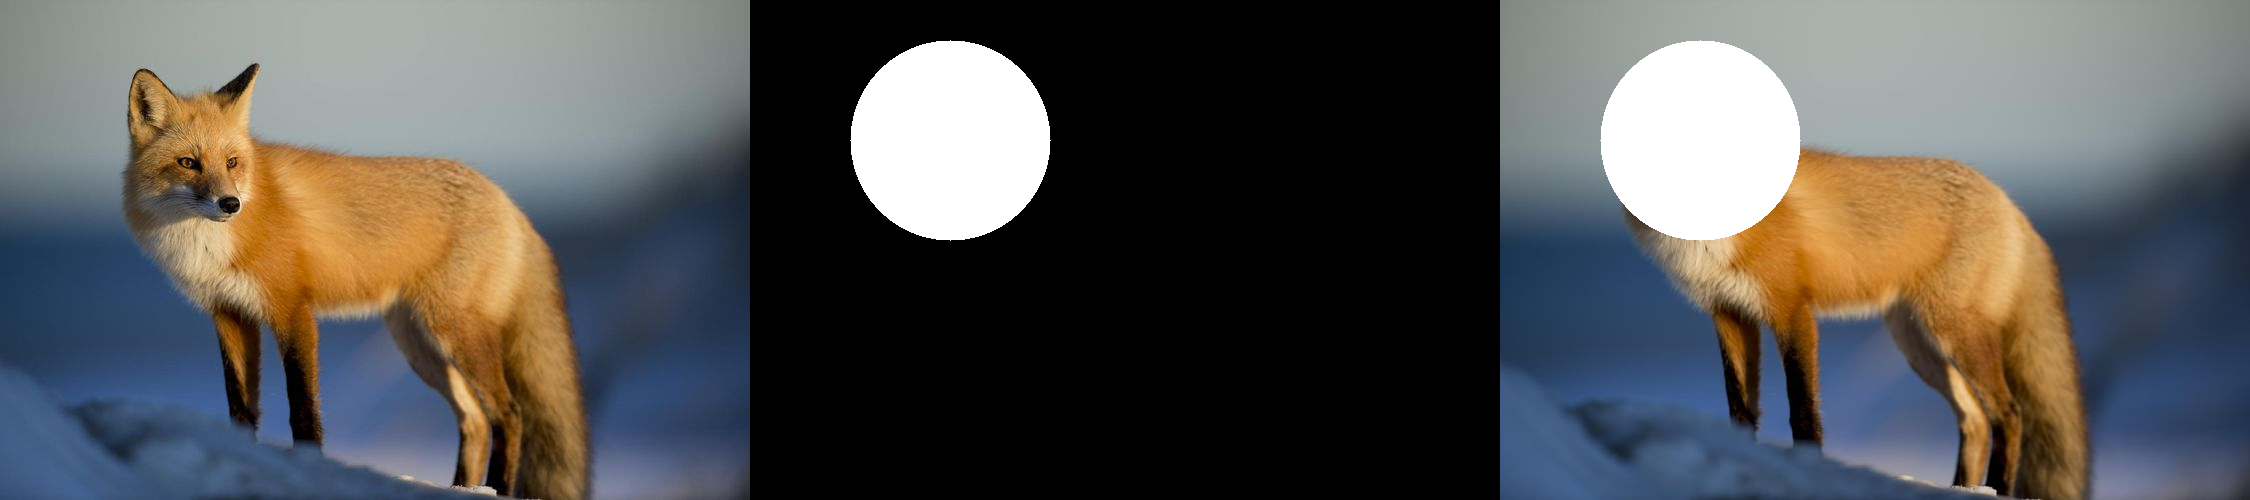

In [54]:
# OR
mask = np.zeros(image.shape, dtype=np.uint8)
mask = cv.circle(mask, (200, 140), 100, (255,255,255), -1)

masked = image | mask

hasil = cv.hconcat((image, mask, masked))
cv2_imshow(hasil)

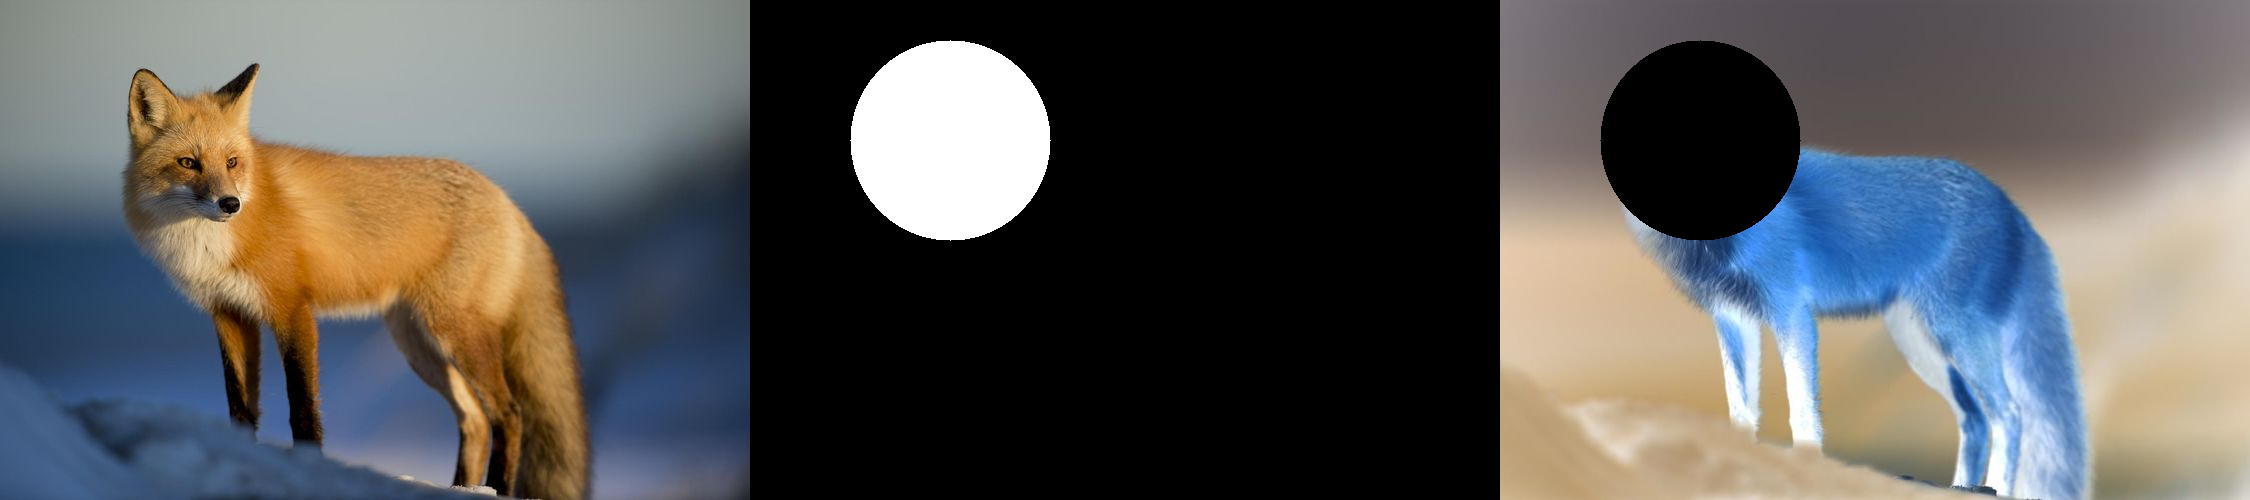

In [56]:
# NOT
mask = np.zeros(image.shape, dtype=np.uint8)
mask = cv.circle(mask, (200, 140), 100, (255,255,255), -1)

masked = ~image & ~mask

hasil = cv.hconcat((image, mask, masked))
cv2_imshow(hasil)

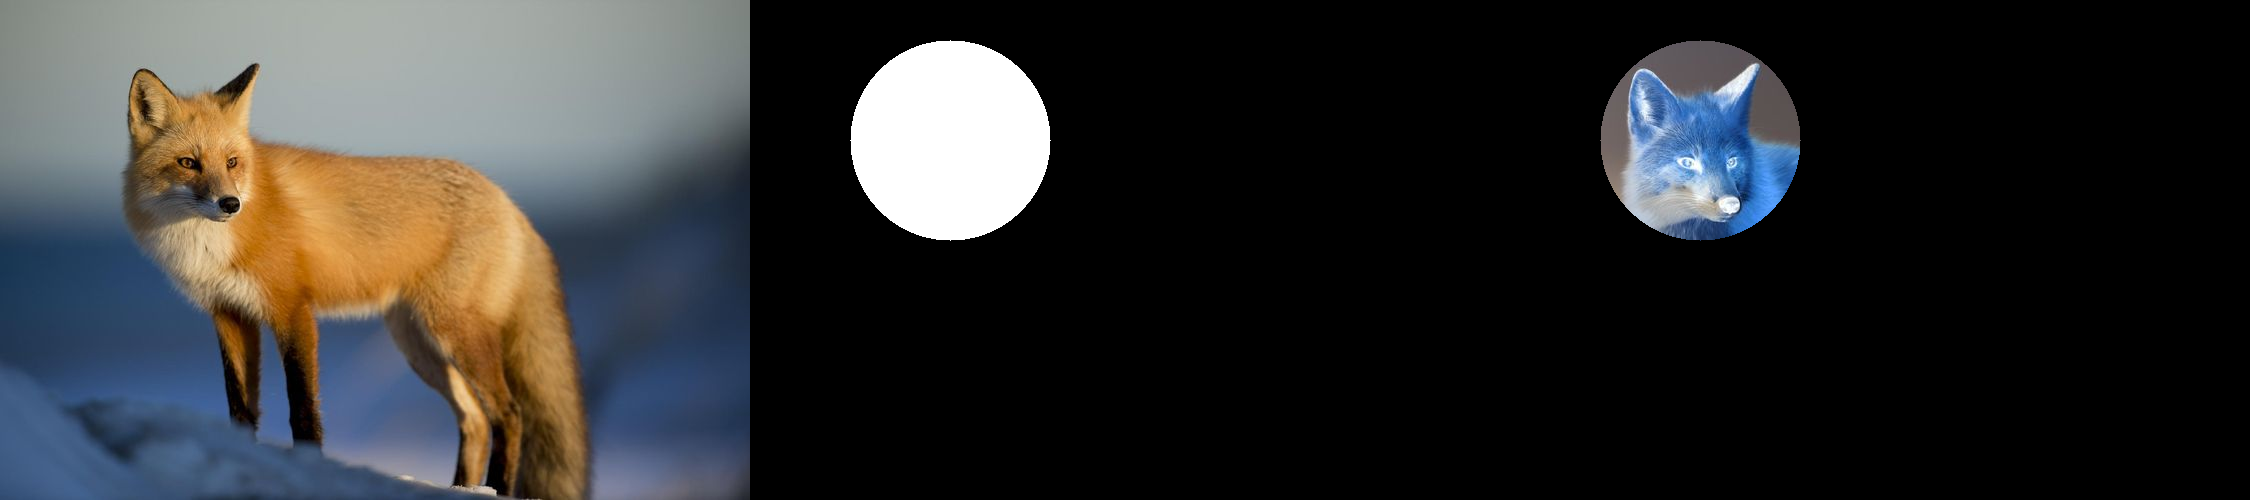

In [58]:
# NAND
mask = np.zeros(image.shape, dtype=np.uint8)
mask = cv.circle(mask, (200, 140), 100, (255,255,255), -1)

masked = ~image & mask

hasil = cv.hconcat((image, mask, masked))
cv2_imshow(hasil)

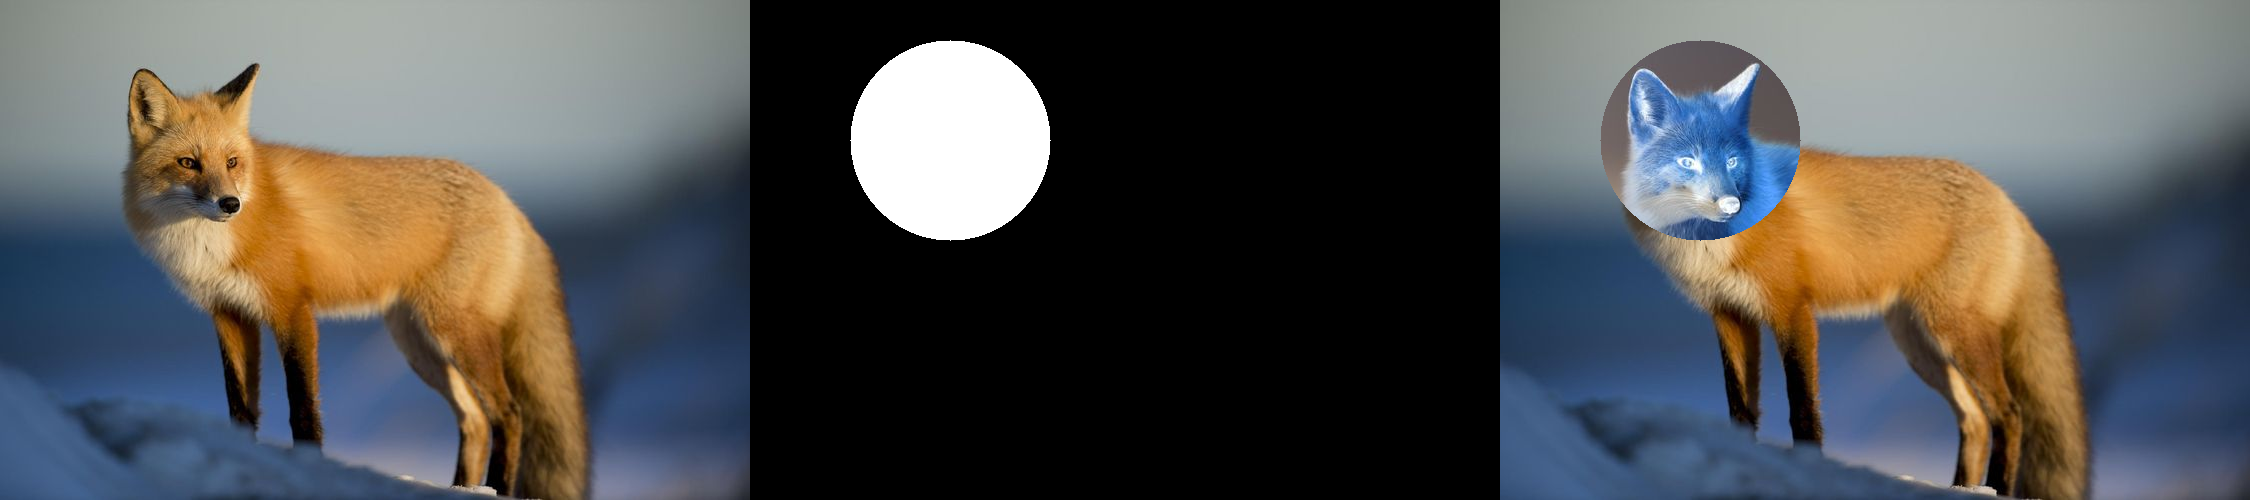

In [59]:
# XOR
mask = np.zeros(image.shape, dtype=np.uint8)
mask = cv.circle(mask, (200, 140), 100, (255,255,255), -1)

masked = image ^ mask

hasil = cv.hconcat((image, mask, masked))
cv2_imshow(hasil)